In [ ]:
  import pandas as pd
df = pd.read_csv('train.csv')# Dataset is now stored in a Pandas Dataframe
print(df)





                    Date  Hour     CellName     Traffic
0       11-01-2017 00:00     0  Cell_000111   102.88011
1       11-01-2017 00:00     1  Cell_000111    14.04496
2       11-01-2017 00:00     2  Cell_000111    26.94778
3       11-01-2017 00:00     3  Cell_000111     5.31896
4       11-01-2017 00:00     4  Cell_000111    54.34799
...                  ...   ...          ...         ...
497539    9/30/2018 0:00    19  Cell_039873  1225.30101
497540    9/30/2018 0:00    20  Cell_039873  3233.99801
497541    9/30/2018 0:00    21  Cell_039873  2007.44666
497542    9/30/2018 0:00    22  Cell_039873  1133.58706
497543    9/30/2018 0:00    23  Cell_039873  1060.66352

[497544 rows x 4 columns]


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

In [ ]:

traffic = []
uni = []
for i in range(0, len(df['CellName'])):
  if(df['CellName'][i] == 'Cell_001912'):
    traffic.append(df['Traffic'][i])
print(len(traffic))


8735


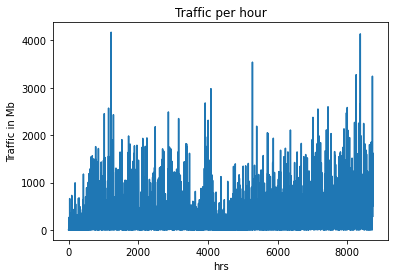

In [ ]:
import matplotlib.pyplot as plt 

plt.title("Traffic per hour") 
plt.xlabel("hrs") 
plt.ylabel("Traffic in Mb") 
plt.plot(traffic)
plt.show()


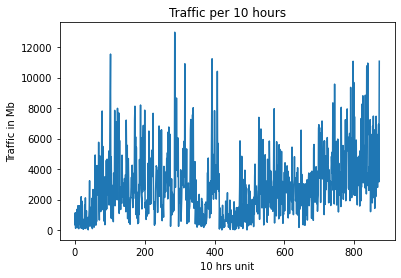

In [ ]:
traffic_per_10 = []

for i in range(0,int(len(traffic)/10)):
  m=0
  for j in range(0,10):
    m+=traffic[10*i +j]
  m/10
  traffic_per_10.append(m)
plt.title("Traffic per 10 hours") 
plt.xlabel("10 hrs unit") 
plt.ylabel("Traffic in Mb") 
plt.plot(traffic_per_10)
plt.show() 





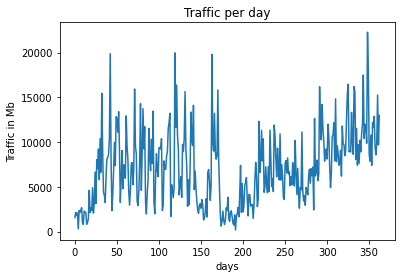

363

In [ ]:
traffic_per_day = []

for i in range(0,int(len(traffic)/24)):
  m=0
  for j in range(0,24):
    m+=traffic[24*i +j]
  m/24
  traffic_per_day.append(m)
plt.title("Traffic per day") 
plt.xlabel("days") 
plt.ylabel("Traffic in Mb") 
plt.plot(traffic_per_day)
plt.show() 

len(traffic_per_day)


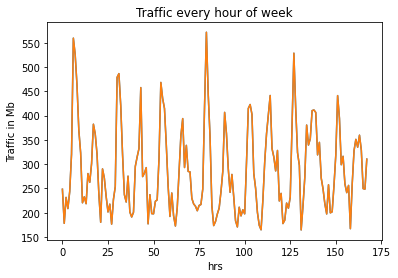

[248.30605019999996, 178.12552879999998, 231.54683260000004, 208.53434640000003, 243.57750880000003, 320.6757546, 559.5385516, 525.8203213999999, 462.93384800000007, 370.0410252000001, 323.24836919999996, 220.4898738, 232.73380939999996, 218.60348340000004, 280.63129480000003, 262.71243059999995, 301.27751219999993, 382.30716459999996, 362.29668560000005, 320.52151699999996, 237.9632928, 180.31851339999997, 290.2586328, 271.3365608, 233.43691960000004, 201.59166320000003, 217.6171112, 176.51381400000005, 227.50147780000006, 253.8392062, 478.7571891999999, 486.47112639999995, 420.5205214, 319.6062552000001, 237.13842359999998, 222.08052520000004, 275.2912942, 201.4362068, 191.2245454000001, 201.0056002, 295.6348097999999, 314.8562820000001, 331.9934851999999, 457.7279944000001, 274.38068, 281.5925346000001, 292.899885, 177.099967, 237.1880289999999, 198.169438, 197.79936220000008, 223.490831, 226.43708520000004, 312.2230108, 468.3265551999999, 435.09384659999995, 414.78664780000014, 339

In [ ]:
every_hour_of_week = []
for i in range(0,168):
  temp=0
  for j in range(i,8400,168):
    temp+=traffic[j]
  every_hour_of_week.append(temp/50)
plt.plot(every_hour_of_week) 
plt.title("Traffic every hour of week") 
plt.xlabel("hrs") 
plt.ylabel("Traffic in Mb") 
plt.plot(every_hour_of_week)
plt.show() 

print(every_hour_of_week)
  

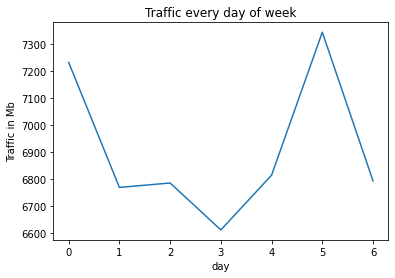

[7233.798908000001, 6770.2175176, 6786.625875200001, 6612.6883612, 6815.6022858, 7345.431526799997, 6794.324239799999]


In [ ]:
days_of_week=[]
for i in range(0,7):
  temp=0
  for j in range(0,24):
    temp+=every_hour_of_week[(24*i)+j]
  days_of_week.append(temp)
plt.plot(days_of_week) 
plt.title("Traffic every day of week") 
plt.xlabel("day") 
plt.ylabel("Traffic in Mb") 
plt.show() 
print(days_of_week)


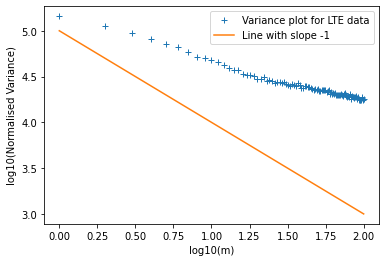

In [ ]:
import statistics
# var1 = statistics.variance(traffic)
# var2 = statistics.variance(traffic_per_100)
var_traffic_m = []
M = []
z = []
for m in range(1,101):
  z.append(m)
  M.append(np.log10(m))
  temp = []
  for i in range(0,int(len(traffic)/m)):
    t=0
    for j in range(0,m):
      t+=traffic[m*i +j]
    t = t/m
    temp.append(t)
  # print(statistics.variance(temp))
  var_traffic_m.append(statistics.variance(temp))

plt.plot(M,np.log10(var_traffic_m),'+',label = 'Variance plot for LTE data')
plt.plot(range(0,3), range(5,2,-1),label = 'Line with slope -1')
plt.xlabel("log10(m)")
plt.ylabel("log10(Normalised Variance)")
plt.legend()
plt.show()

# print(len(var_traffic_m))



In [ ]:
x = M;
y = []
for i in range(0,100):
  y.append(np.log10(var_traffic_m[i]))
print(y)

from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B
popt, pcov = curve_fit(f, x, y) # your data x, y to fit

print(popt[0])



[5.158506195121704, 5.05370906632579, 4.9783417443832665, 4.914296270443802, 4.854851765934027, 4.81828249989801, 4.768000461540122, 4.715821045090114, 4.7009495394792005, 4.6775457748256795, 4.66152057463993, 4.629354937508007, 4.591280796691672, 4.5757346853187135, 4.569983445297103, 4.527173643016016, 4.513642689999769, 4.516095322598275, 4.503319025419834, 4.474398511942468, 4.471312254702666, 4.490314417241808, 4.456525339129482, 4.4600146843964685, 4.446703101861842, 4.429613480817599, 4.441971641897111, 4.438753839540807, 4.427079832610206, 4.442156221300161, 4.421412578061592, 4.405899688648485, 4.398902261765217, 4.414518270995755, 4.4044591257421475, 4.397273170643183, 4.431526716059286, 4.408136549067331, 4.374276965034044, 4.3749027847721855, 4.395778346927202, 4.396697178649536, 4.388105492936885, 4.382700998023725, 4.3696723906571275, 4.3602117911661376, 4.357586833583695, 4.366599664514876, 4.355623990348642, 4.3680155066189, 4.343152894825136, 4.341051652660449, 4.35791

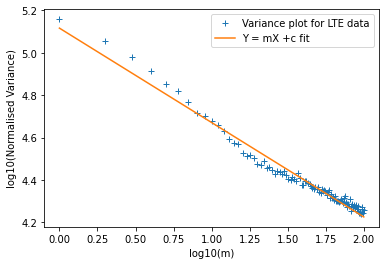

In [ ]:
plt.plot(M,np.log10(var_traffic_m),'+',label = 'Variance plot for LTE data')
x1 = range(0,3)
plt.plot(x1, popt[0]*x1 + popt[1],label = 'Y = mX +c fit')
plt.xlabel("log10(m)")
plt.ylabel("log10(Normalised Variance)")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


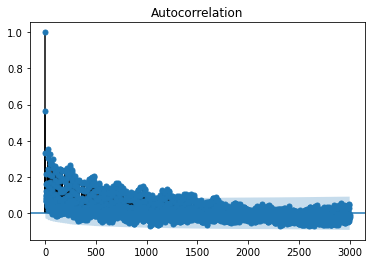

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress
plot_acf(traffic, lags=3000)
plt.show()



In [ ]:
plot_acf(traffic_per_100,lags=20)
plt.show()

NameError: ignored

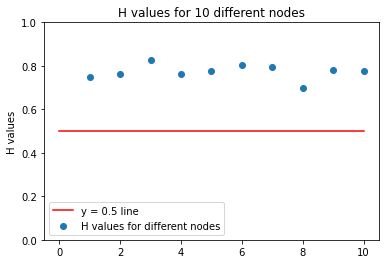

In [ ]:
Cells = ['Cell_000111', 'Cell_000112', 'Cell_000113','Cell_000231','Cell_000232','Cell_000233','Cell_000461','Cell_000462','Cell_000463','Cell_001912']
slope = []
C = []
beta_value = []
H_value = []

def calculate(Cells):
  H = []
  for cell in Cells:
    traffic = []
    for i in range(0, len(df['CellName'])):
      if(df['CellName'][i] == cell):
        traffic.append(df['Traffic'][i])
    var_traffic_m = []
    M = []
    z = []
    for m in range(1,101):
      z.append(m)
      M.append(np.log10(m))
      temp = []
      for i in range(0,int(len(traffic)/m)):
        t=0
        for j in range(0,m):
          t+=traffic[m*i +j]
        t = t/m
        temp.append(t)
      # print(statistics.variance(temp))
      var_traffic_m.append(statistics.variance(temp))

    # plt.plot(M,np.log10(var_traffic_m),'+')
    # plt.plot(range(0,3), range(5,2,-1))
    # plt.show()
    x = M;
    y = []
    for i in range(0,100):
      y.append(np.log10(var_traffic_m[i]))

    from scipy.optimize import curve_fit
    from sklearn.linear_model import LinearRegression
    def f(x, A, B): # this is your 'straight line' y=f(x)
        return A*x + B
    popt, pcov = curve_fit(f, x, y) # your data x, y to fit
    slope.append(popt[0])
    C.append(popt[1])
    beta_value.append(-popt[0])
    H_value.append(1+ popt[0]/2)

    H.append(1 + popt[0]/2)

  f = []
  for i in range(0,11):
    f.append(0.5)   
  plt.scatter(range(1,11),H,label = 'H values for different nodes')

  plt.plot(range(0,11),f, 'r',label = 'y = 0.5 line')
  plt.ylim([0, 1])
  plt.ylabel('H values')
 
  plt.title('H values for 10 different nodes')
  plt.legend(loc = 'lower left')
  plt.show()

calculate(Cells)


In [ ]:
!pip install tabulate
from tabulate import tabulate

In [ ]:
table = [['   Cell Id', '                A*x + B', 'beta   ', 'Hurst parameter   ']]

for i in range(0,10):
  temp = [Cells[i],str(slope[i]) + '*x + '+ str(C[i]),str(beta_value[i]),str(H_value[i])]
  table.append(temp)
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒══════════════╤═════════════════════════════════════════════╤═══════════╤══════════════════════╕
│    Cell Id   │                 A*x + B                     │   beta    │   Hurst parameter    │
╞══════════════╪═════════════════════════════════════════════╪═══════════╪══════════════════════╡
│ Cell_000111  │ -0.5048886657050763*x + 5.881310697038597   │  0.504889 │             0.747556 │
├──────────────┼─────────────────────────────────────────────┼───────────┼──────────────────────┤
│ Cell_000112  │ -0.47420761455870564*x + 5.3577196417669635 │  0.474208 │             0.762896 │
├──────────────┼─────────────────────────────────────────────┼───────────┼──────────────────────┤
│ Cell_000113  │ -0.34961805216086006*x + 5.453306975104272  │  0.349618 │             0.825191 │
├──────────────┼─────────────────────────────────────────────┼───────────┼──────────────────────┤
│ Cell_000231  │ -0.4732641697597102*x + 5.559633607880568   │  0.473264 │             0.763368 │
├──────────────┼────